The goal of this code is to compute ELI for any SST dataset (models, obs, etc.). If there is temperature data is over land, those points must be masked via a land-sea mask data file with the same lats and lons at the SST data itself. The masking can be done in this code, just set "apply_mask = True".

Code adapted by Alex Gonzalez from Christina Patricola's GrADs script. Last Edit: 5 Oct 2020

In [28]:
# necessary imports for plotting, xarray, metpy, etc.
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
from metpy.constants import g, omega as o, Re as a
from metpy.units import units
from datetime import date
import metpy.calc as mpcalc
from metpy.plots import ContourPlot, ImagePlot, MapPanel, PanelContainer
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy

In [29]:
# replace with files for models of interest
dri = '/chinook/dallmann/HAD_SST/ts/'
fn  = 'ts_HAD_1950-2014.nc'

# output directory and file
dro = '/chinook/dallmann/MPI_SST/'
fn_output = 'ELI_HAD_1950-2014.nc'

apply_mask = True
if apply_mask == True:
   # replace with file for land sea mask
   dri_mask = '/chinook/dallmann/HAD_SST/'
   fn_mask  = 'lsm_HAD.nc'

In [30]:
data = xr.open_dataset(dri+fn)

# Parse using MetPy, so we can MetPy operations with it
data = data.metpy.parse_cf()
#data

# Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
# data

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [31]:
# equatorial domain
lats = -8.
latn =  8.

# for Pacific Ocean calculation
lonw = 115.
lone = 290.

# times of interest (1950-2014 for Allysa's project)
time0 = '1950-01-16'
timef = '2014-12-16'

In [32]:
# save SST data into it's own xarray to perform operations
SST_raw = data['ts'] 
if apply_mask == True:
   lsm = xr.open_dataset(dri_mask+fn_mask)
   cond = (['lsm_HAD'] == 0) # 0 for ocean typically
   SST_raw_mask = SST_raw.where(lsm['lsm_HAD'] == 0)

SST_raw_mask

<xarray.DataArray 'ts' (time: 780, lat: 324, lon: 432)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [236.3081 , 236.30078, 236.3518 , ..., 236.24634, 236.26416,
         236.30762],
        [236.1482 , 236.16626, 236.1853 , ..., 236.15918, 236.18018,
         236.15527],
        [236.13379, 236.15771, 236.13257, ..., 236.10669, 236.10107,
         236.10718]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [255.40479, 255.43604, 255.479  , ..., 255.32056, 255.36499,
         255.40894],
        [254.29565, 254.32227, 254.33154, ..., 254.28076, 254.2771 ,
         254.30371],
        [253.05566, 253.07202, 253.07837, ..., 253.05127, 253.06299,
         253.08447]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [246.09229, 246.125  , 246.19019, ..., 245.95166, 245.99658,
         246.04834],
        [245.57446, 245.58203, 245.594  , ..., 245.52808, 245.573  ,
         245.57861],
        [244.81543, 244.80737, 244.82275, ..., 244.77393, 244.7893 ,
         244.76465]]], dtype=float32)
Coordinates:
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
    metpy_crs  object Projection: latitude_longitude
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  mo: (stash: m01s00i024, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-23T15:14:52Z altered by CMOR: replaced missing va...

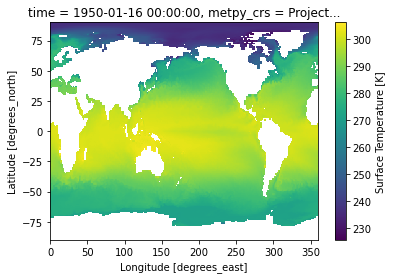

In [33]:
# test plot
#SST_raw_mask.sel(time=time0,lat=slice(lats, latn)).plot()

SST_raw_mask.sel(time=time0).plot()

# First we compute equatorial (5S--5N) averaged SST for each month for all longitudes

In [34]:
SST_thresh = SST_raw_mask.sel(time=slice(time0,timef),lat=slice(lats, latn)).compute().mean("lon").mean("lat")
SST_thresh

# Next we compute equatorial (5S--5N) SST for each month for all longitudes only over the Pacific Ocean

<xarray.DataArray 'ts' (time: 780)>
array([300.5587 , 300.68973, 301.0542 , 301.31732, 300.99634, 300.5591 ,
       300.10522, 299.89444, 300.02084, 300.22684, 300.62958, 300.69894,
       300.73532, 301.01956, 301.42706, 301.5681 , 301.33078, 300.85162,
       300.32666, 299.97952, 300.09937, 300.51337, 300.8373 , 301.02417,
       301.18137, 301.48282, 301.84427, 302.02682, 301.71613, 301.1356 ,
       300.4533 , 300.05145, 300.13522, 300.39273, 300.75125, 300.99185,
       301.0484 , 301.26053, 301.55185, 301.86942, 301.42902, 300.68637,
       300.22647, 300.05786, 300.22247, 300.5051 , 300.634  , 300.89566,
       300.91608, 301.16217, 301.39484, 301.62427, 301.3387 , 300.7956 ,
       300.35123, 300.04672, 300.0678 , 300.3443 , 300.63425, 300.8123 ,
       300.92984, 300.9773 , 301.22723, 301.55328, 301.29767, 300.75613,
       300.29843, 300.04736, 300.14606, 300.562  , 301.00668, 301.26096,
       301.36957, 301.54013, 301.91864, 302.1395 , 301.8264 , 301.27618,
       300.76923, 300.50708, 300.63556, 300.91592, 301.25122, 301.50513,
       301.65186, 301.7889 , 301.97507, 302.32175, 302.08472, 301.3548 ,
       300.88614, 300.6819 , 300.70767, 300.97675, 301.18927, 301.31915,
       301.3881 , 301.61493, 301.93674, 302.11703, 301.84726, 301.1536 ,
       300.60645, 300.3112 , 300.40305, 300.79858, 301.0359 , 301.2452 ,
       301.21298, 301.38177, 301.65967, 301.7166 , 301.38712, 300.72507,
       300.19168, 300.00125, 300.11996, 300.44232, 300.77084, 300.89523,
...
       300.80243, 300.59497, 300.71725, 301.10016, 301.51324, 301.78485,
       301.89926, 302.158  , 302.44644, 302.72647, 302.5205 , 301.7517 ,
       301.04376, 300.76752, 300.72894, 300.91016, 301.14984, 301.4121 ,
       301.49393, 301.64877, 302.018  , 302.2086 , 301.8785 , 301.2807 ,
       300.65585, 300.2729 , 300.437  , 300.8596 , 301.144  , 301.32492,
       301.4153 , 301.5173 , 301.8543 , 302.0806 , 301.82617, 301.26102,
       300.78345, 300.3887 , 300.53342, 300.91245, 301.22678, 301.44998,
       301.64194, 301.76752, 302.02127, 302.22333, 301.90155, 301.12402,
       300.53955, 300.26123, 300.12866, 300.4157 , 300.74362, 300.81155,
       300.88657, 301.19296, 301.40723, 301.62872, 301.4283 , 300.88943,
       300.4578 , 300.13217, 300.2901 , 300.63535, 301.0114 , 301.12668,
       301.16635, 301.3814 , 301.69742, 302.04147, 301.85864, 301.41327,
       300.9732 , 300.7573 , 300.87485, 301.23825, 301.6174 , 301.84933,
       302.00677, 302.19806, 302.43878, 302.6518 , 302.39932, 301.71732,
       301.1276 , 300.8283 , 300.96866, 301.33276, 301.6639 , 301.92328,
       302.0245 , 302.17087, 302.35764, 302.5143 , 302.0834 , 301.31567,
       300.69727, 300.34677, 300.17648, 300.42612, 300.7535 , 300.684  ,
       300.81192, 301.10196, 301.35773, 301.7357 , 301.39352, 300.90643,
       300.59357, 300.45456, 300.5749 , 300.8769 , 301.15424, 301.2329 ],
      dtype=float32)
Coordinates:
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    metpy_crs  object Projection: latitude_longitude

In [35]:
SST_pac = SST_raw_mask.sel(time=slice(time0,timef),lat=slice(lats, latn),lon=slice(lonw,lone)).compute()
SST_pac

# Now we take the differences between the equatorial SSTs over the Pacific Ocean and the equatorial thresholds for each month

<xarray.DataArray 'ts' (time: 780, lat: 28, lon: 210)>
array([[[304.07422, 303.885  , 303.43433, ...,       nan,       nan,
               nan],
        [303.27612, 303.6787 , 303.38428, ...,       nan,       nan,
               nan],
        [303.2544 , 303.42285, 303.312  , ...,       nan,       nan,
               nan],
        ...,
        [302.65674,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.188  ,       nan,       nan, ...,       nan,       nan,
               nan],
        [301.9585 , 302.05347, 301.4712 , ...,       nan,       nan,
               nan]],

       [[302.64355, 302.5183 , 302.4402 , ...,       nan,       nan,
               nan],
        [302.0996 , 302.2666 , 302.3833 , ...,       nan,       nan,
               nan],
        [302.00464, 302.1543 , 302.38403, ...,       nan,       nan,
               nan],
...
        [303.23975,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.90283,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.68408, 302.89185, 302.65845, ...,       nan,       nan,
               nan]],

       [[304.2373 , 303.8252 , 303.62012, ...,       nan,       nan,
               nan],
        [303.8452 , 303.82642, 303.60864, ...,       nan,       nan,
               nan],
        [303.81177, 303.7727 , 303.57935, ...,       nan,       nan,
               nan],
        ...,
        [303.05225,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.64624,       nan,       nan, ...,       nan,       nan,
               nan],
        [302.29785, 302.3772 , 301.97192, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -7.5 -6.944 -6.389 -5.833 ... 5.833 6.389 6.944 7.5
  * lon        (lon) float64 115.4 116.2 117.1 117.9 ... 287.1 287.9 288.7 289.6
    metpy_crs  object Projection: latitude_longitude
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  mo: (stash: m01s00i024, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-23T15:14:52Z altered by CMOR: replaced missing va...

In [36]:
SST_diff = SST_pac - SST_thresh
SST_diff

# Now find longitudes where the threshold is met and take the mean longitude

<xarray.DataArray 'ts' (time: 780, lat: 28, lon: 210)>
array([[[3.5155334 , 3.3263245 , 2.8756409 , ...,        nan,
                nan,        nan],
        [2.7174377 , 3.1200256 , 2.825592  , ...,        nan,
                nan,        nan],
        [2.6957092 , 2.8641663 , 2.7533264 , ...,        nan,
                nan,        nan],
        ...,
        [2.098053  ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.629303  ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.3998108 , 1.4947815 , 0.9125061 , ...,        nan,
                nan,        nan]],

       [[1.9538269 , 1.8285828 , 1.7504578 , ...,        nan,
                nan,        nan],
        [1.4098816 , 1.5768738 , 1.693573  , ...,        nan,
                nan,        nan],
        [1.3149109 , 1.4645691 , 1.6943054 , ...,        nan,
                nan,        nan],
...
        [2.0855103 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.7485962 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.5298462 , 1.7376099 , 1.5042114 , ...,        nan,
                nan,        nan]],

       [[3.0043945 , 2.5922852 , 2.387207  , ...,        nan,
                nan,        nan],
        [2.6123047 , 2.5935059 , 2.3757324 , ...,        nan,
                nan,        nan],
        [2.5788574 , 2.539795  , 2.3464355 , ...,        nan,
                nan,        nan],
        ...,
        [1.8193359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.4133301 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [1.0649414 , 1.1442871 , 0.7390137 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -7.5 -6.944 -6.389 -5.833 ... 5.833 6.389 6.944 7.5
  * lon        (lon) float64 115.4 116.2 117.1 117.9 ... 287.1 287.9 288.7 289.6
    metpy_crs  object Projection: latitude_longitude

In [37]:
# set up conditional statements 
cond = (SST_diff >= 0) 

eli = SST_diff.lon.where((cond),drop=False).mean('lon').mean('lat')
eli

<xarray.DataArray 'lon' (time: 780)>
array([160.95000628, 158.60480492, 160.46435138, 155.49764493,
       165.24269707, 170.12354042, 173.24746593, 175.10999502,
       172.75132621, 170.68909593, 167.65684856, 168.38499229,
       162.9057534 , 165.05983442, 162.52519096, 168.10113678,
       169.49750732, 171.68550169, 175.69877786, 178.66393903,
       178.80492287, 173.94988776, 170.83049179, 171.08487579,
       170.73110904, 177.34828976, 203.85200971, 197.50001865,
       179.70670303, 177.77297397, 181.37825053, 180.58840409,
       179.21221334, 172.23352093, 169.08117926, 168.63321854,
       163.90498632, 171.04806965, 184.07736047, 176.5282449 ,
       173.93097185, 176.22567561, 177.48352425, 177.4619182 ,
       174.99536181, 168.32926649, 166.62230261, 165.25511568,
       163.57238228, 163.28395708, 166.73852632, 158.38368201,
       167.17206741, 170.67047796, 173.51185269, 176.29286631,
       173.54809419, 172.53731587, 168.01091894, 164.37892173,
       160.15512613, 164.19051204, 166.77749197, 161.32526552,
       169.68734681, 175.97616105, 178.95065238, 180.18226482,
       180.51665258, 177.57090546, 176.54413498, 176.77518324,
       177.94054247, 179.22834516, 181.9461488 , 187.95186344,
       182.53427572, 184.50432074, 185.96154134, 185.51479158,
...
       168.90248855, 174.51869759, 179.28676082, 179.38934968,
       180.38586058, 175.31917611, 171.8349183 , 174.96641915,
       173.87867779, 180.76957268, 191.7724984 , 177.06901156,
       176.24180896, 177.45322739, 178.7376658 , 176.99475923,
       173.21100734, 170.56547518, 165.51974207, 160.09779031,
       164.58300879, 160.56087812, 159.72842737, 157.94046607,
       165.32138567, 167.64968379, 171.6950997 , 175.61333155,
       173.89159884, 169.69612943, 166.85901343, 164.85533557,
       164.27849622, 162.29014412, 162.51095791, 160.96464153,
       170.82157409, 178.27390944, 182.51702882, 185.80140113,
       185.32379386, 184.17738479, 180.6650088 , 185.84617628,
       192.73758902, 201.89158256, 208.96245411, 192.78803601,
       186.54228102, 184.70534859, 185.33128336, 184.03497846,
       183.72542997, 177.48856774, 173.13759222, 170.77861972,
       174.61578743, 179.97050391, 188.08122109, 180.39177963,
       173.17599844, 176.11957903, 176.44627929, 174.5424186 ,
       171.25594766, 165.78323335, 159.76678411, 157.84493201,
       160.53751228, 161.33438319, 160.93239212, 158.55145461,
       164.51557689, 169.45006667, 171.80708847, 174.21108295,
       173.19621053, 168.16258572, 166.89077083, 163.95320602])
Coordinates:
    metpy_crs  object Projection: latitude_longitude
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00

In [12]:
eli.name = 'eli'
eli.attrs['long_name'] = 'ENSO_longitude_Index'
eli.attrs['units'] = 'degress_east'
eli.attrs['citation'] = 'Williams and Patricola (2018, GRL)'
eli.attrs['link'] = 'https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018GL079203'
eli_nc = eli.drop_vars('metpy_crs')
eli_nc

<xarray.DataArray 'eli' (time: 780)>
array([162.0246119 , 169.76840913, 165.56562998, 167.63634248,
       172.70089711, 168.14338098, 165.67486806, 166.70347905,
       161.62416841, 159.47400716, 156.98629178, 156.90971741,
       157.45493811, 174.30302482, 162.39445211, 171.63447576,
       167.56915019, 170.14807103, 169.97606818, 169.56011096,
       164.24009622, 163.6375482 , 159.60899828, 160.74482106,
       167.9444452 , 167.91550162, 166.58131769, 172.10162102,
       175.53061519, 175.6368242 , 178.10911158, 177.29678388,
       175.56082867, 169.1123834 , 171.67605393, 165.55863386,
       168.16730007, 169.62725813, 173.19501174, 176.68372717,
       174.45657253, 178.87524095, 178.17510287, 176.72295091,
       173.12875417, 169.17321258, 164.23870148, 163.70617205,
       162.47387087, 167.85375521, 182.34941018, 174.19499726,
       172.31859918, 175.18571919, 174.22037295, 173.31518852,
       172.31222395, 168.26090591, 169.76864386, 167.97120413,
       171.95790782, 182.38927762, 191.91858189, 186.51715971,
       180.60045047, 180.5770537 , 180.34673792, 181.37451846,
       180.66801808, 175.46288572, 172.9603743 , 175.16201383,
       171.5567329 , 181.04412965, 172.90825518, 167.08015362,
       177.57666535, 175.34491017, 175.96061856, 174.30221442,
...
       177.5445984 , 172.81482822, 172.83488463, 174.70470231,
       172.84139997, 170.14350683, 164.54875178, 164.56956601,
       166.19575065, 165.6099259 , 165.02580558, 160.50823804,
       170.47248649, 172.9074598 , 171.01711899, 172.69859425,
       169.87608809, 170.0656997 , 169.38166652, 169.67501155,
       175.54888749, 173.09947806, 170.34633771, 176.13753748,
       179.65973441, 179.80849922, 180.69912253, 179.45002245,
       178.02974837, 175.56233098, 170.57642438, 165.99068688,
       168.28954965, 182.2918668 , 186.07933728, 187.40206325,
       187.48569535, 181.66536815, 180.79107337, 179.06704887,
       174.9966526 , 171.57788915, 166.6257971 , 164.08874069,
       163.82722153, 168.95087509, 166.22129765, 168.85003342,
       174.01029399, 173.58506797, 174.93344542, 175.41859296,
       173.6019631 , 171.90271388, 168.48364132, 169.11530748,
       171.83139719, 168.50849456, 173.20502082, 176.84306654,
       176.60756049, 179.55172655, 178.13316956, 177.89546817,
       174.2255314 , 170.98631628, 168.24752486, 167.11065741,
       167.59339346, 176.42226761, 176.33812413, 173.10085405,
       180.37789702, 181.55239905, 179.05394773, 176.841623  ,
       173.23958613, 168.69322149, 165.46078691, 166.02348792])
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:  ENSO_longitude_Index
    units:      degress_east
    citation:   Williams and Patricola (2018, GRL)
    link:       https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018...

In [13]:
#eli_nc.to_netcdf(path=dro+fn_output)